In [1]:
pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 kB 1.8 MB/s eta 0:00:00


In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch


data = {
    "Adson": [0, 3, 4, 7],
    "Andre Santos": [3, 0, 1, 2],
    "Cleyton": [4, 1, 0, 1],
    "Edgar Neto": [2, 2, 1, 0]
}


df = pd.DataFrame(data, index=["Adson", "Andre Santos", "Cleyton", "Edgar Neto"])
df

,Adson,Andre Santos,Cleyton,Edgar Neto
Adson,0,3,4,2
Andre Santos,3,0,1,2
Cleyton,4,1,0,1
Edgar Neto,7,2,1,0


<ipython-input-5-fdf74eaeb83e>:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for receiver, num_passes in passes.iteritems():


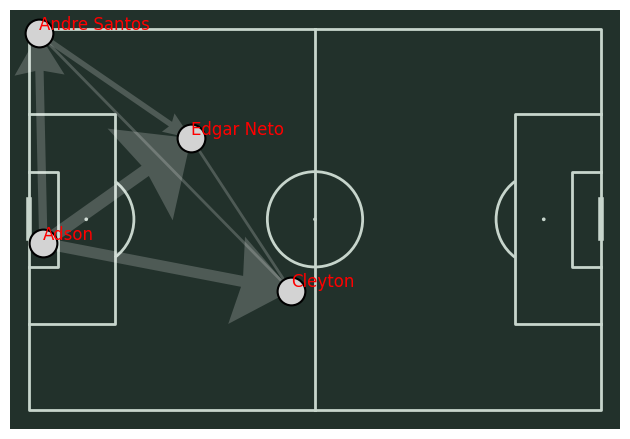

In [5]:
# Posições dos jogadores no campo (valores fictícios)
positions = {
    "Adson": (3, 45),
    "Andre Santos": (2, 1),
    "Cleyton": (55, 55),
    "Edgar Neto": (34, 23)
}

# Cria um gráfico não direcionado vazio
G = nx.Graph()

# Adiciona arestas com pesos ao gráfico
for sender, passes in df.iterrows():
    for receiver, num_passes in passes.iteritems():
        if not pd.isna(num_passes):  # Ignora os valores NaN
            # Se a aresta já existe, soma os pesos
            if G.has_edge(sender, receiver):
                G[sender][receiver]['weight'] += num_passes
            else:
                G.add_edge(sender, receiver, weight=num_passes)

# Cria o campo de futebol
pitch = Pitch(pitch_type='statsbomb',
              pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw()

# Desenha as setas para os passes
for edge in G.edges(data=True):
    sender = edge[0]
    receiver = edge[1]
    weight = edge[2]['weight']
    if weight > 0:  # Adiciona esta linha
        pitch.arrows(positions[sender][0], positions[sender][1], positions[receiver][0], positions[receiver][1],
                     width=weight, headwidth=weight, color='w', ax=ax, zorder=1, alpha=.2)

# Desenha os nós para os jogadores
for node, position in positions.items():
    pitch.scatter(position[0], position[1], s=400, color='#d3d3d3', edgecolors='black', linewidth=1.5, alpha=1, zorder=1, ax=ax)
    plt.text(position[0], position[1], node, color="red",fontsize=12, va='bottom')

plt.show()


**Agora tentarei importar diretamente do excel para automatizar o processo com do dados do footstats**


In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch

# dados direito do excel para automatizar o envio dos dados, o index_col =0 permite utilizar a primeira coluna como index
df = pd.read_csv('bangula.csv', sep=";", index_col=0)

# print(data)
df

# df = pd.DataFrame(df,index=["Adson", "Andre Santos", "Cleyton", "Edgar Neto"])
# df

,Adson,Anderson L,Bruno T,Cleyton,Erick D,Felipe S,Gabriel C,Gabriel L,Gabriel S,Gabryel F,João M,Marreta,Victor O,Walney
Adson,0,0,1,9,3,0,6,1,0,0,3,0,3,4
Anderson L,0,0,0,2,1,0,1,0,0,0,0,0,0,2
Bruno T,1,1,0,0,1,0,5,0,0,0,0,0,0,3
Cleyton,2,0,1,0,1,0,6,3,0,0,0,0,0,5
Erick D,12,2,0,6,7,0,0,0,0,0,3,1,2,5
Felipe S,3,2,1,0,0,7,2,0,1,0,3,2,3,5
Gabriel C,3,1,2,0,0,0,1,0,0,0,3,2,4,5
Gabriel L,3,0,0,0,0,0,3,0,0,0,3,3,5,5
Gabriel S,2,0,3,3,0,0,0,2,0,0,3,4,5,5
Gabryel F,1,0,0,3,0,0,0,0,0,0,3,5,6,5


**Consegui importar os dados, agora irei colocar uma posição aproximada dos jogadores para ficar próximo ao modelo do campo**

<ipython-input-11-dd22db645a1b>:26: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for receiver, num_passes in passes.iteritems():


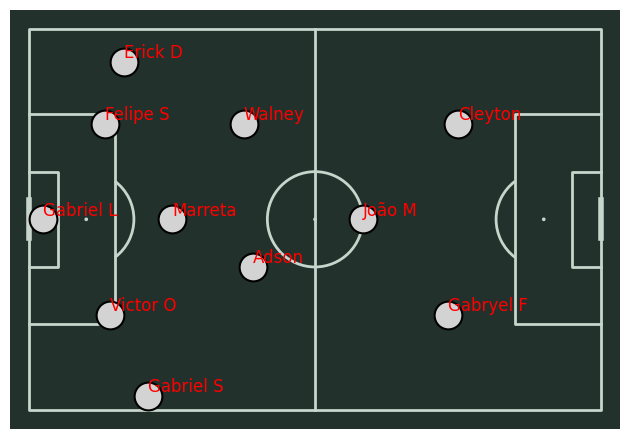

In [11]:
# Posições dos jogadores no campo (valores fictícios)

# Os jogadores comentadores são os reservas
positions = {
    "Adson": (47, 50),
    # "Anderson L": (0, 0),
    # "Bruno T": (0, 0),
    "Cleyton": (90, 20),
    "Erick D": (20, 7),
    "Felipe S":(16,20),
    "Gabriel L":(3,40),
    "Gabriel S":(25,77),
    # "Gabriel C":(0,0),
    "Gabryel F":(88,60),
    "João M": (70,40),
    "Marreta":(30,40),
    "Victor O": (17,60),
    "Walney": (45,20),
}

# Cria um gráfico não direcionado vazio
G = nx.Graph()

# Adiciona arestas com pesos ao gráfico
for sender, passes in df.iterrows():
    for receiver, num_passes in passes.iteritems():
        if not pd.isna(num_passes):  # Ignora os valores NaN
            # Se a aresta já existe, soma os pesos
            if G.has_edge(sender, receiver):
                G[sender][receiver]['weight'] += num_passes
            else:
                G.add_edge(sender, receiver, weight=num_passes)

# Cria o campo de futebol
pitch = Pitch(pitch_type='statsbomb',
              pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw()

# Desenha as setas para os passes
# for edge in G.edges(data=True):
#     sender = edge[0]
#     receiver = edge[1]
#     weight = edge[2]['weight']
#     if weight > 0:  # Adiciona esta linha
#         pitch.arrows(positions[sender][0], positions[sender][1], positions[receiver][0], positions[receiver][1],
#                      width=weight, headwidth=weight, color='w', ax=ax, zorder=1, alpha=.2)

# Desenha os nós para os jogadores
for node, position in positions.items():
    pitch.scatter(position[0], position[1], s=400, color='#d3d3d3', edgecolors='black', linewidth=1.5, alpha=1, zorder=1, ax=ax)
    plt.text(position[0], position[1], node, color="red",fontsize=12, va='bottom')

plt.show()
